# Librerías
---

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

# Punto 4
---


Se tienen dos casos:

Caso 1: $q=1$.

$$
\begin{align*}
    &\frac{du}{dt}=u^q\implies\int\frac{du}{u}=\int{dt}\implies ln(u)=t\implies u=e^t.\\
    &\therefore\,u(t) = e^{t}.
\end{align*}
$$

Caso 2: $q<1$.

Nótese que para $q<1$  la ecuación diferencial se convierte en una ecuación de Bernoulli. Tomemos, entonces, $z = u^{1-q}$. Luego,
$$
\begin{align*}
    &u=z^{\frac{1}{1-q}}\implies\frac{du}{dt}\frac{1}{1-q}z^{\frac{1}{1-q}-1}\frac{dz}{dt}.\\
    &\text{Luego, como } zu^{-1}=u^{-q}\implies \frac{z}{z^{\frac{1}{1-q}}}=(1-q)z^{\frac{1}{1-q}-1}\frac{dt}{dz}.\\
    &\implies z\frac{dz}{dt}=(1-q)z\implies \frac{dz}{dt}=1-q\implies z=t(1-q)+c\implies u={(t(1-q)+c)}^{\frac{1}{1-q}}.\\
\end{align*}
$$
Finalmente, evaluando $u(0) = 1$, es fácil ver que  $c=1$.

$\therefore\,u(t)=((1-q)t +1)^{\frac{1}{1-q}}$ cuando $q<1$.

Adicionalmente dado que $0<q<1\,\wedge\,t\in[0,10]\rightarrow 0<1-q\rightarrow 0\leq t(1-q)<t(1-q)+1$.

# Punto 5
---

In [2]:
q = np.array([0.,.2,.4,.7,.9,1.])

In [3]:
def f(y,q):
    return y**q

def ExactF(t,q):
    return (t*(1-q)+1)**(1/(1-q))

def GetEuler2(f,x,q):
    dx = x[1] - x[0]
    y = np.zeros_like(x)
    y[0] = 1
    for i in range(1,len(x)):
        k1 = f(y[i-1],q)
        k2 = f(y[i-1]+k1*dx,q)
        
        y[i] = y[i-1]+.5*(k1+k2)*dx
    
    return y

0.0
0.2
0.4
0.7
0.9


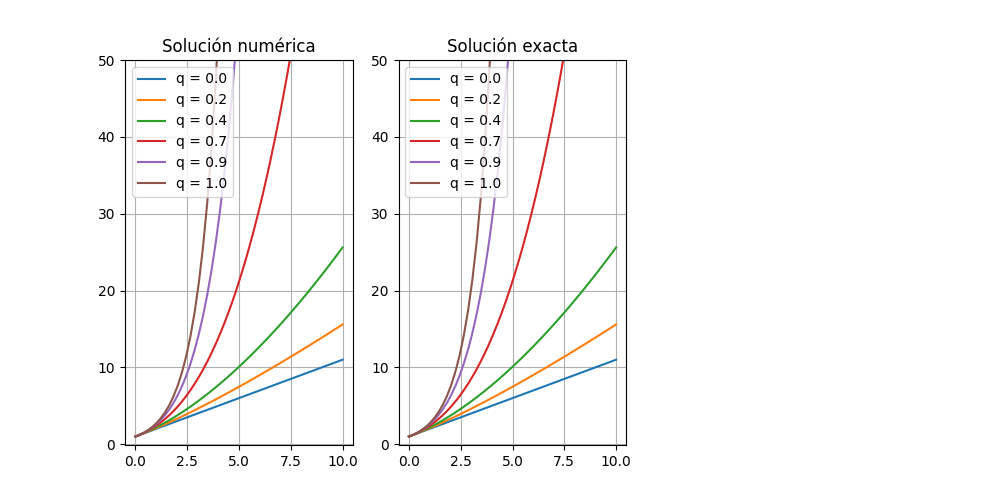

In [4]:
fig_solving = plt.figure(figsize=(10,5))
ax1 = fig_solving.add_subplot(131)
ax2 = fig_solving.add_subplot(132)

t = np.linspace(0,10)
ax1.set_ylim(-0.1,50)
ax2.set_ylim(-0.1,50)
ax1.grid()
ax2.grid()

for i,j in enumerate(q):
    y = GetEuler2(f,t,j)
    ax1.plot(t,y,label="q = %s"%(j))

    if not q[i] == 1:
        print(q[i])
        ax2.plot(t,ExactF(t,q[i]),label="q = %s"%(j))
    else:
        ax2.plot(t,np.exp(t),label="q = %s"%(j))

        
ax1.set_title("Solución numérica")
ax2.set_title("Solución exacta")

ax1.legend()
ax2.legend()

# Punto 6
---

Supongamos que demostré las fórmulas esas y pasemos a los cálculos.

In [8]:
G, alpha, e, a = 4*np.pi**2, 1.1e-8, 0.205630,0.387098
t = np.arange(0,1,1e-8)